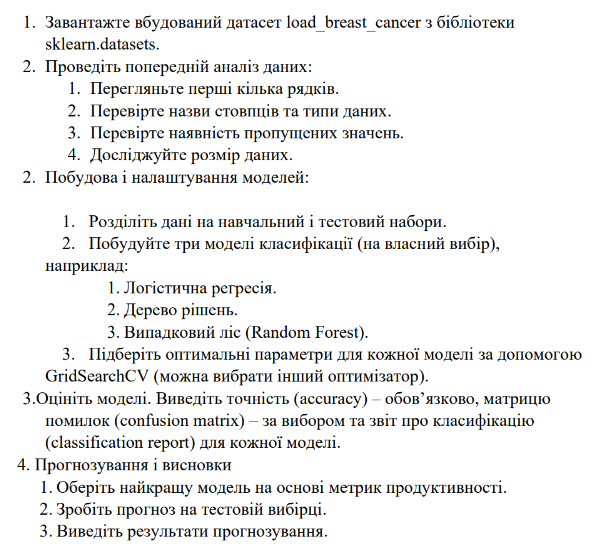

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
print("Перші 5 рядків датасету:")
print(df.head())

print("\nНазви стовпців та типи даних:")
print(df.dtypes)

print("\nНаявність пропущених значень:")
print(df.isnull().sum())

print("\nРозмір датасету:")
print(df.shape)

Перші 5 рядків датасету:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wor

In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_tree = {'max_depth': [3, 5, 10, None]}
param_grid_forest = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10, None]}

grids = {
    'Logistic Regression': GridSearchCV(models['Logistic Regression'], param_grid_logreg, cv=5, scoring='accuracy'),
    'Decision Tree': GridSearchCV(models['Decision Tree'], param_grid_tree, cv=5, scoring='accuracy'),
    'Random Forest': GridSearchCV(models['Random Forest'], param_grid_forest, cv=5, scoring='accuracy')
}

for name, grid in grids.items():
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n{name} - Найкращі параметри: {grid.best_params_}")
    print(f"Точність: {accuracy_score(y_test, y_pred):.4f}")
    print("Матриця помилок:")
    print(confusion_matrix(y_test, y_pred))
    print("Звіт про класифікацію:")
    print(classification_report(y_test, y_pred))


Logistic Regression - Найкращі параметри: {'C': 100}
Точність: 0.9561
Матриця помилок:
[[39  4]
 [ 1 70]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Decision Tree - Найкращі параметри: {'max_depth': 3}
Точність: 0.9474
Матриця помилок:
[[39  4]
 [ 2 69]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest - Найкращі параметри: {'max_depth': None, 'n_estimators': 50}
Точність:

In [5]:
best_model = grids['Random Forest'].best_estimator_

y_pred_best = best_model.predict(X_test)

print("\nПрогноз на тестовій вибірці (Random Forest):")
print(y_pred_best)



Прогноз на тестовій вибірці (Random Forest):
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


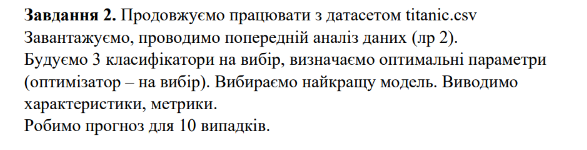

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/LabColab/titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
print("Перші 5 рядків:")
print(df.head())

print("\nРозмір датасету:")
print(df.shape)

print("\nТипи даних:")
print(df.dtypes)

print("\nПропущені значення до обробки:")
print(df.isnull().sum())

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

Перші 5 рядків:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Розмір датасету:
(418, 12)

Типи даних:
PassengerId      int64
Surviv

In [16]:
print("\nПропущені значення після заповнення:")
print(df.isnull().sum())

print("\nЧи є дублікати:")
print(df.duplicated().sum())

print("\nОписова статистика:")
print(df.describe())

df.drop('Cabin', axis=1, inplace=True)

selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df[selected_columns]

df_selected['Sex'] = df_selected['Sex'].apply(lambda x: 1 if x == 'male' else 0)

print("\nПропущені значення в обраних стовпцях:")
print(df_selected.isnull().sum())


Пропущені значення після заповнення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Чи є дублікати:
0

Описова статистика:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000 

<ipython-input-16-6d43b82154c0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex'] = df_selected['Sex'].apply(lambda x: 1 if x == 'male' else 0)


In [17]:
print("\nОновлені перші 5 рядків:")
print(df_selected.head())

print("\nРозмір оновленого датасету:")
print(df_selected.shape)

survival_by_sex = df_selected.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання за статтю:")
print(survival_by_sex)

survival_by_class = df_selected.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання за класом:")
print(survival_by_class)

age_survived = df_selected[df_selected['Survived'] == 1]['Age'].mean()
age_not_survived = df_selected[df_selected['Survived'] == 0]['Age'].mean()
print(f"\nСередній вік виживших: {age_survived:.2f}")
print(f"Середній вік не виживших: {age_not_survived:.2f}")

fare_bins = pd.cut(df_selected['Fare'], bins=5)
survival_by_fare_bins = df_selected.groupby(fare_bins)['Survived'].mean() * 100
print("\nВідсоток виживання за групами тарифу:")
print(survival_by_fare_bins)

average_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф за класами:")
print(average_fare_by_class)

age_by_class = df_selected.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів за класами:")
print(age_by_class)


Оновлені перші 5 рядків:
   Survived  Pclass  Sex   Age     Fare
0         0       3    1  34.5   7.8292
1         1       3    0  47.0   7.0000
2         0       2    1  62.0   9.6875
3         0       3    1  27.0   8.6625
4         1       3    0  22.0  12.2875

Розмір оновленого датасету:
(418, 5)

Відсоток виживання за статтю:
Sex
0    100.0
1      0.0
Name: Survived, dtype: float64

Відсоток виживання за класом:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

Середній вік виживших: 30.27
Середній вік не виживших: 30.27

Відсоток виживання за групами тарифу:
Fare
(-0.512, 102.466]      34.366925
(102.466, 204.932]     53.846154
(204.932, 307.398]     64.705882
(307.398, 409.863]           NaN
(409.863, 512.329]    100.000000
Name: Survived, dtype: float64

Середній тариф за класами:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64

Середній вік пасажирів за класами:
Pclass
1    40.022928
2    28.857881
3    26.0903

<ipython-input-17-071c252012ef>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_bins = df_selected.groupby(fare_bins)['Survived'].mean() * 100


**Взявши інформацію з Lab #2 переходимо до вирішення Lab #4**


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()

In [21]:
tree = DecisionTreeClassifier()

forest = RandomForestClassifier()

param_grid_log_reg = {'C': [0.1, 1, 10]}
param_grid_tree = {'max_depth': [3, 5, 10]}
param_grid_forest = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10]}

grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_forest = GridSearchCV(forest, param_grid_forest, cv=5)

grid_log_reg.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)
grid_forest.fit(X_train, y_train)

y_pred_log_reg = grid_log_reg.predict(X_test)
y_pred_tree = grid_tree.predict(X_test)
y_pred_forest = grid_forest.predict(X_test)

In [22]:
print("Логістична регресія:")
print("Найкращі параметри:", grid_log_reg.best_params_)
print("Точність:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

print("\nДерево рішень:")
print("Найкращі параметри:", grid_tree.best_params_)
print("Точність:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

print("\nВипадковий ліс:")
print("Найкращі параметри:", grid_forest.best_params_)
print("Точність:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Логістична регресія:
Найкращі параметри: {'C': 1}
Точність: 0.6071428571428571
              precision    recall  f1-score   support

           0       0.61      0.96      0.74        50
           1       0.60      0.09      0.15        34

    accuracy                           0.61        84
   macro avg       0.60      0.52      0.45        84
weighted avg       0.60      0.61      0.51        84


Дерево рішень:
Найкращі параметри: {'max_depth': 5}
Точність: 0.6309523809523809
              precision    recall  f1-score   support

           0       0.65      0.82      0.73        50
           1       0.57      0.35      0.44        34

    accuracy                           0.63        84
   macro avg       0.61      0.59      0.58        84
weighted avg       0.62      0.63      0.61        84


Випадковий ліс:
Найкращі параметри: {'max_depth': 5, 'n_estimators': 10}
Точність: 0.6309523809523809
              precision    recall  f1-score   support

           0       0.64    

In [23]:
best_model = grid_forest if grid_forest.best_score_ > grid_tree.best_score_ and grid_forest.best_score_ > grid_log_reg.best_score_ else (grid_tree if grid_tree.best_score_ > grid_log_reg.best_score_ else grid_log_reg)

print("\nПрогноз для 10 випадків:")
print(best_model.predict(X_test[:10]))


Прогноз для 10 випадків:
[0 1 0 0 0 0 0 0 0 0]
